In [105]:
import pandas as pd
import numpy as np
file_path = r"C:\Users\z\Desktop\数据挖掘\数据挖掘指定任务\力学性质方向论文数据.xlsx"
df = pd.read_excel(file_path)
df.head()

,序号,作者,题名,刊名,年,作者单位,摘要
0,1,"王金秀,潘黎明.",纺织科学与工程核心期刊被引频次及影响因子研究,武汉纺织大学学报,2011,武汉纺织大学,"评价学术单位或科研人员的科研水平或学术论文的科学价值,长期以来存在较大的争议。本文根据200..."
1,2,"严蔷薇,龚文正,赵林阳.",高校二级学院心理工作站建设探析--以武汉纺织大学纺织科学与工程学院为例,求知导刊,2015,"武汉纺织大学,武汉纺织大学,武汉纺织大学",随着高校大学生心理健康教育的开展与不断深入，由于经费条件及人员欠缺等限制，传统的由高校大学生...
2,3,"张雷,郑欣.",论纺织类专业大学生社会实践长效机制的建立——以武汉纺织大学纺织科学与工程学院为例,湖北经济学院学报（人文社会科学版）,2012,武汉纺织大学,文章以武汉纺织大学纺织科学与工程学院（以下简称“纺织学院”）2011年暑期社会实践案例为依托...
3,4,"王小俊,刘琼珍,刘轲,等.",纺织院校高分子材料与工程专业特色化人才培养模式探索,纺织服装教育,2017,"武汉纺织大学,武汉纺织大学,武汉纺织大学,武汉纺织大学","纺织类院校高分子材料与工程专业应依托纺织产业链,结合专业特点,设置连通纺织产业链科学知识的课..."
4,5,"黄乐平,王罗新.",构建材料科学与工程专业卓越工程师培养模式,广州化工,2015,"武汉纺织大学,武汉纺织大学",为适应卓越工程师“知识结构合理、综合能力强和人文社会素质高的高分子材料本科应用型高级工程人才...


高频词汇： [('性能', 876), ('制备', 672), ('纤维', 515), ('及其', 460), ('复合材料', 280), ('纳米', 223), ('结构', 181), ('复合', 181), ('影响', 180), ('材料', 177)]


C:\Users\z\AppData\Local\Temp\ipykernel_120948\2593250576.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='Blues_d')


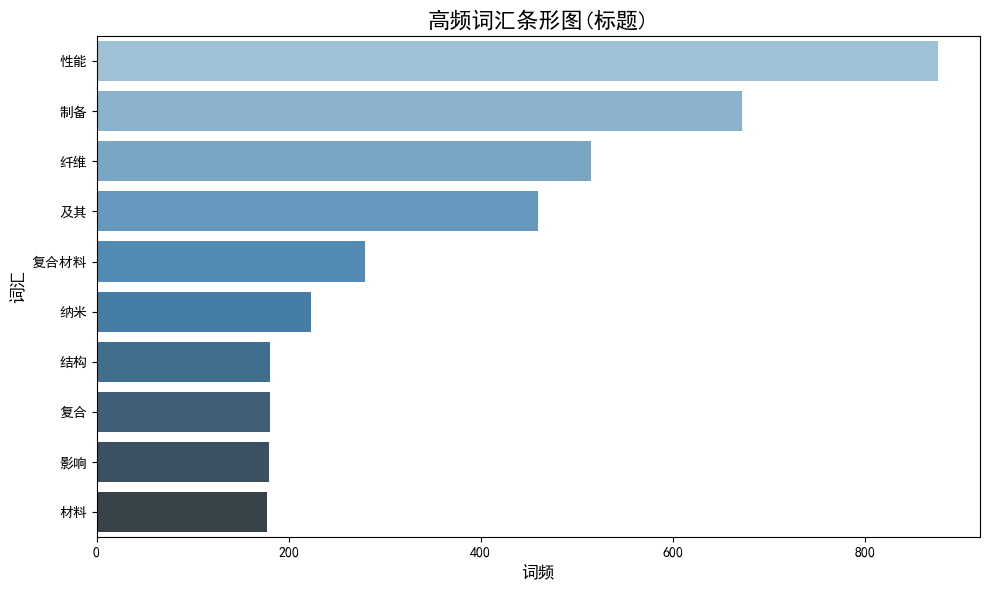

In [107]:
import pandas as pd
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

# 设置matplotlib支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体为SimHei
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

# 获取标题列
titles = df['题名'].dropna()
# 文本清洗：去掉标点符号和数字
def clean_text(text):
    # 只保留中文字符
    text = re.sub(r'[^\u4e00-\u9fa5]', '', text)
    return text
# 清洗所有标题
cleaned_titles = titles.apply(clean_text)
# 使用jieba进行中文分词
words = []
for title in cleaned_titles:
    words.extend(jieba.cut(title))    
# 去除常见的无意义词
stopwords = ['的', '与', '和', '在', '为', '对', '研究', '分析', '探讨', '发展', '基于', '应用']
filtered_words = [word for word in words if word not in stopwords and len(word) > 1]

# 计算词频
word_counts = Counter(filtered_words)

# 输出前10个高频词
print("高频词汇：", word_counts.most_common(10))

# 提取前 10 高频词汇
top_words = word_counts.most_common(10)

# 分离词和频率
words, counts = zip(*top_words)

# 设置图形样式
plt.figure(figsize=(10, 6))  # 设置图形大小
sns.barplot(x=list(counts), y=list(words), palette='Blues_d')

# 设置标题和标签
plt.title("高频词汇条形图(标题)", fontsize=16)
plt.xlabel("词频", fontsize=12)
plt.ylabel("词汇", fontsize=12)

# 显示图形
plt.tight_layout()  # 确保布局紧凑
plt.savefig('标题中高频词汇.png',dpi=600)
plt.show()

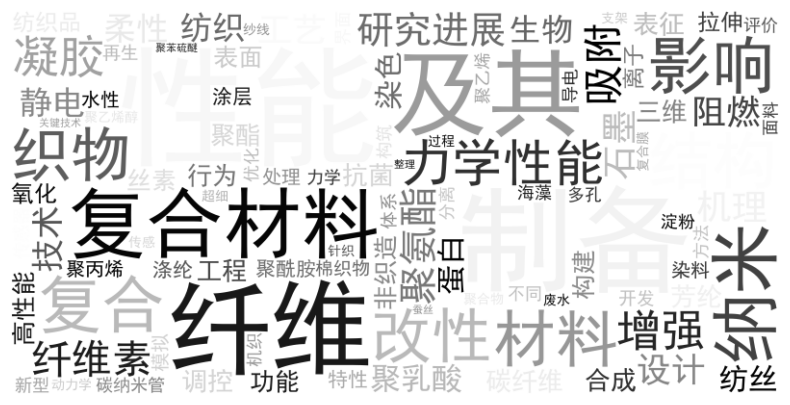

In [109]:
# 生成词云，设置简洁的背景色与配色
wordcloud = WordCloud(
    font_path='C:/Windows/Fonts/simhei.ttf',  # 使用适合中文显示的字体
    width=800,  # 图像宽度
    height=400,  # 图像高度
    background_color='white',  # 背景颜色为白色，保持简洁
    max_words=100,  # 显示最多100个词
    colormap='gray',  # 使用灰度色调，更符合科学期刊风格
    contour_width=0,  # 不使用轮廓线
    contour_color='white',  # 轮廓颜色白色（如果有轮廓）
    margin=2  # 增加词与词之间的间距
).generate_from_frequencies(word_counts)

# 绘制词云
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')  # 插值方法为双线性插值
plt.axis('off')  # 不显示坐标轴
plt.savefig('词云图(标题).png',dpi=600)
# 显示词云
plt.show()

高频词汇： [('纤维', 8759), ('性能', 6059), ('制备', 4132), ('材料', 4074), ('结构', 4045), ('具有', 3784), ('织物', 3707), ('进行', 3646), ('通过', 3344), ('纳米', 3081)]


C:\Users\z\AppData\Local\Temp\ipykernel_120948\2930774728.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='Blues_d')


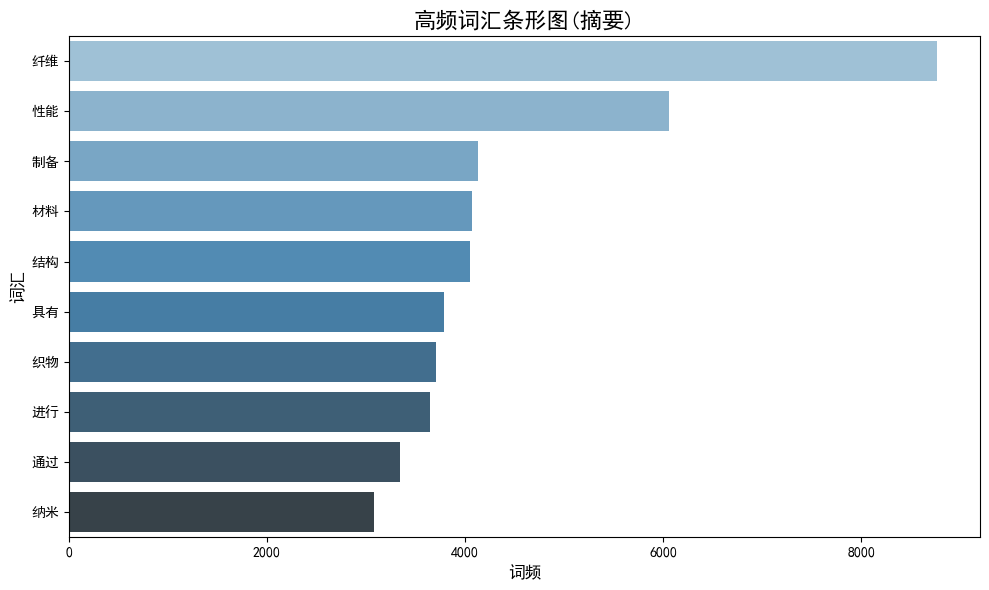

In [110]:
# 获取摘要列
abstracts = df['摘要'].dropna()

# 文本清洗：去掉标点符号和数字
def clean_text(text):
    # 只保留中文字符
    text = re.sub(r'[^\u4e00-\u9fa5]', '', text)
    return text

# 清洗所有摘要
cleaned_abstracts = abstracts.apply(clean_text)

# 使用jieba进行中文分词
words = []
for abstract in cleaned_abstracts:
    words.extend(jieba.cut(abstract))

# 去除常见的无意义词
stopwords = ['的', '与', '和', '在', '为', '对', '研究', '分析', '探讨', '发展', '基于', '应用']
filtered_words = [word for word in words if word not in stopwords and len(word) > 1]

# 计算词频
word_counts = Counter(filtered_words)

# 提取前 10 高频词汇
top_words = word_counts.most_common(10)

# 输出前10个高频词
print("高频词汇：", word_counts.most_common(10))
# 提取前 10 高频词汇
top_words = word_counts.most_common(10)

# 分离词和频率
words, counts = zip(*top_words)

# 设置图形样式
plt.figure(figsize=(10, 6))  # 设置图形大小
sns.barplot(x=list(counts), y=list(words), palette='Blues_d')

# 设置标题和标签
plt.title("高频词汇条形图(摘要)", fontsize=16)
plt.xlabel("词频", fontsize=12)
plt.ylabel("词汇", fontsize=12)

# 显示图形
plt.tight_layout()  # 确保布局紧凑
plt.savefig('摘要中高频词汇.png',dpi=600)
plt.show()

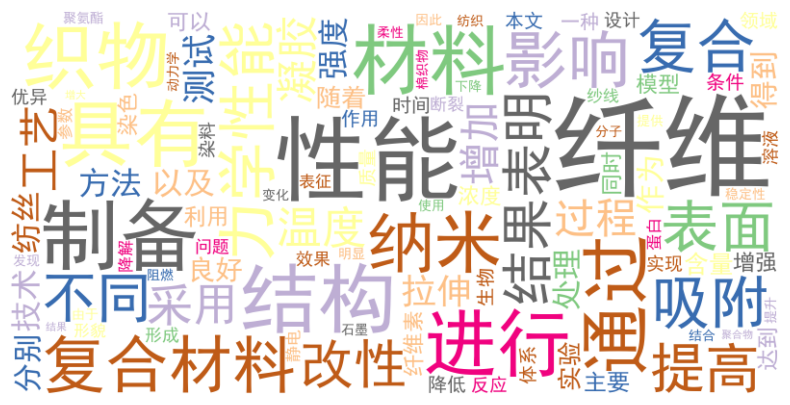

In [111]:
# 生成词云，设置简洁的背景色与配色
wordcloud = WordCloud(
    font_path='C:/Windows/Fonts/simhei.ttf',  # 使用适合中文显示的字体
    width=800,  # 图像宽度
    height=400,  # 图像高度
    background_color='white',  # 背景颜色为白色，保持简洁
    max_words=100,  # 显示最多100个词
    colormap='Accent', 
    contour_width=0,  # 不使用轮廓线
    contour_color='white',  # 轮廓颜色白色（如果有轮廓）
    margin=2  # 增加词与词之间的间距
).generate_from_frequencies(word_counts)

# 绘制词云
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')  # 插值方法为双线性插值
plt.axis('off')  # 不显示坐标轴
plt.savefig('词云图(摘要).png',dpi=600)
# 显示词云
plt.show()
